In [19]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
insurance = pd.read_csv('./insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Converting categorical features into numerical features

+ Use pandas get dummies

In [22]:
insurance_one_hot = pd.get_dummies(insurance).astype(np.float32)

In [23]:
insurance_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float32
 1   bmi               1338 non-null   float32
 2   children          1338 non-null   float32
 3   charges           1338 non-null   float32
 4   sex_female        1338 non-null   float32
 5   sex_male          1338 non-null   float32
 6   smoker_no         1338 non-null   float32
 7   smoker_yes        1338 non-null   float32
 8   region_northeast  1338 non-null   float32
 9   region_northwest  1338 non-null   float32
 10  region_southeast  1338 non-null   float32
 11  region_southwest  1338 non-null   float32
dtypes: float32(12)
memory usage: 62.8 KB


Create features and labels

In [24]:
X = insurance_one_hot.drop("charges",axis=1)
Y=insurance_one_hot["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000000,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.879999,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [25]:
Y.head()

0    16884.923828
1     1725.552246
2     4449.461914
3    21984.470703
4     3866.855225
Name: charges, dtype: float32

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

### Building a neural network

In [28]:
tf.random.set_seed(42)

In [29]:
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
insurance_model.fit(x_train,y_train,epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 9038.1484 - mae: 9038.1484
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7876.2544 - mae: 7876.2544
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7603.5435 - mae: 7603.5435
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7690.4463 - mae: 7690.4463
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7673.7808 - mae: 7673.7808
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7574.7734 - mae: 7574.7734
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7556.4775 - mae: 7556.4775
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7807.1313 - mae: 7807.1313
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7505.2876 - mae: 7505.2876
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7565.2617 - mae: 7565.2617

In [31]:
# Check the result
insurance_model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7467.5088 - mae: 7467.5088


[7467.5087890625, 7467.5087890625]

In [34]:
y_train.median(), y_train.mean()

(9575.442, 13346.09)

We need to improve our model...
+ Add extra layer
+ Train for longer
+ Use different optimizers

In [37]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
insurance_model_2.fit(x_train, y_train, epochs=100,verbose=0)

In [38]:
insurance_model_2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4838.1802 - mae: 4838.1802


[4838.18017578125, 4838.18017578125]

In [42]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
history = insurance_model_3.fit(x_train, y_train, epochs=200,verbose=0)

In [43]:
insurance_model_3.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3495.4846 - mae: 3495.4846


[3495.484619140625, 3495.484619140625]

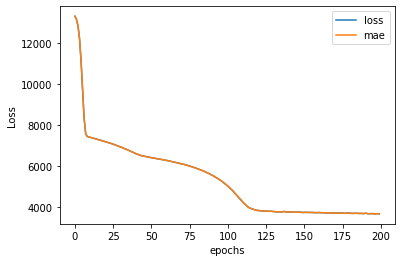

In [45]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs");

Early Stopping Callback helps us to find for how long a model needs to be trained

### Preprocessing ( Standardization and Normalization Data )

In [46]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000000,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.879999,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.969999,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18.0,31.920000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18.0,36.849998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21.0,25.799999,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:ylabel='Frequency'>

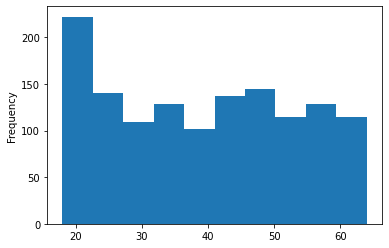

In [48]:
X["age"].plot(kind='hist')

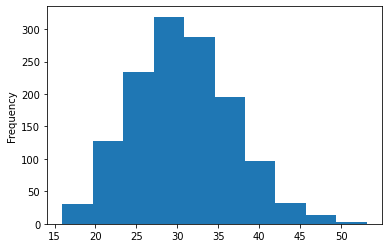

In [49]:
X["bmi"].plot(kind="hist");

In [50]:
X["children"].value_counts()

0.0    574
1.0    324
2.0    240
3.0    157
4.0     25
5.0     18
Name: children, dtype: int64

### Neural networks tends to prefer normalization

In [52]:
import pandas as pd
import matplotlib.pylab as plt
import tensorflow as tf

# Read insurance dataset
insurance = pd.read_csv('./insurance.csv')
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [62]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, minmax_scale, OneHotEncoder
from sklearn.model_selection import train_test_split


ct = make_column_transformer((MinMaxScaler(), ["age", "bmi", "children"]),(OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"]))

X = insurance.drop("charges", axis=1)
Y = insurance["charges"]


x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

ct.fit(x_train)

x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [66]:
x_train_normal[0]


array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [68]:
x_train.shape

(1070, 6)

In [69]:
x_train_normal.shape

(1070, 11)

In [70]:
# Build a model
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
insurance_model_4.fit(x_train_normal, y_train, epochs=200,verbose=0)

In [71]:
insurance_model_4.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3166.9998 - mae: 3166.9998


[3166.999755859375, 3166.999755859375]